In [ ]:
import os
import glob
import numpy as np
import nibabel as ni

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Root_Dir = '/content/drive/MyDrive/BMEN4460 DL in BMI Final Project/DL_data'

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# **train**

In [ ]:
train_data_path = list()

for i in range(120):
  ct_path = f'{Root_Dir}/Train/image/Train_v{i+1:04}_ct.nii.gz'
  msk_path = f'{Root_Dir}/Train/mask/Train_v{i+1:04}_seg.nii.gz'

  train_data_path.append((ct_path, msk_path))
  
len(train_data_path)

120

In [ ]:
train_data_path[0]

('/content/drive/MyDrive/BMEN4460 DL in BMI Final Project/DL_data/Train/image/Train_v0001_ct.nii.gz',
 '/content/drive/MyDrive/BMEN4460 DL in BMI Final Project/DL_data/Train/mask/Train_v0001_seg.nii.gz')

In [ ]:
index = 10

In [ ]:
ct_img = ni.load(train_data_path[index][0]).get_fdata()
msk_img = ni.load(train_data_path[index][1]).get_fdata()

# **test**

In [ ]:
test_data_path = list()

for i in range(79):
  ct_path = f'{Root_Dir}/Test/image/Test_v{i+1:04}_ct.nii.gz'
  msk_path = f'{Root_Dir}/Test/mask/Test_v{i+1:04}_seg.nii.gz'

  test_data_path.append((ct_path, msk_path))
  
len(test_data_path)

79

In [ ]:
test_data_path[0]

('/content/drive/MyDrive/BMEN4460 DL in BMI Final Project/DL_data/Test/image/Test_v0001_ct.nii.gz',
 '/content/drive/MyDrive/BMEN4460 DL in BMI Final Project/DL_data/Test/mask/Test_v0001_seg.nii.gz')

In [ ]:
index = 10

In [ ]:
ct_img = ni.load(test_data_path[index][0]).get_fdata()
msk_img = ni.load(test_data_path[index][1]).get_fdata()

optional for plotting purposes:

In [ ]:
ct_img[ct_img < -1024] = -1024
ct_img[ct_img > 400] = 400
ct_img = (ct_img+1024)/(1024 + 400)

# **validation**

In [ ]:
val_data_path = list()

for i in range(50):
  ct_path = f'{Root_Dir}/Validation/image/Validation_v{i+1:04}_ct.nii.gz'
  msk_path = f'{Root_Dir}/Validation/mask/Validation_v{i+1:04}_seg.nii.gz'

  val_data_path.append((ct_path, msk_path))
  
len(val_data_path)

50

In [ ]:
val_data_path[0]

('/content/drive/MyDrive/BMEN4460 DL in BMI Final Project/DL_data/Validation/image/Validation_v0001_ct.nii.gz',
 '/content/drive/MyDrive/BMEN4460 DL in BMI Final Project/DL_data/Validation/mask/Validation_v0001_seg.nii.gz')

In [ ]:
index = 10

In [ ]:
ct_img = ni.load(val_data_path[index][0]).get_fdata()
msk_img = ni.load(val_data_path[index][1]).get_fdata()

optional for plotting purposes:

In [ ]:
ct_img[ct_img < -1024] = -1024
ct_img[ct_img > 400] = 400
ct_img = (ct_img+1024)/(1024 + 400)

# **plot**

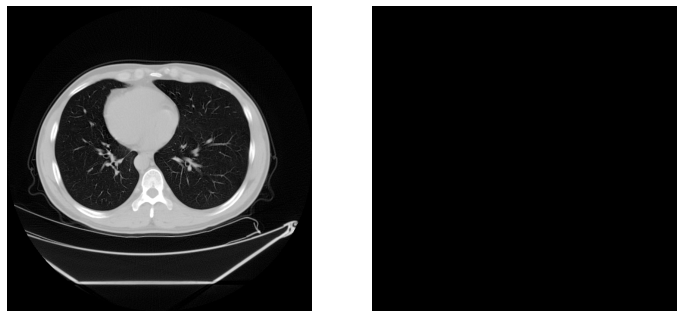

In [ ]:
slice_num = 25

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(np.rot90(ct_img[:,:,slice_num], k=-1), cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.rot90(msk_img[:,:,slice_num], k=-1), cmap='gray')
plt.axis('off')

plt.show()


# **make train/val/test pairs**

In [ ]:
# /content/drive/MyDrive/BMEN4460 DL in BMI Final Project/DL_data

In [ ]:
# !rm -r /content/drive/MyDrive/BMEN4460\ DL\ in\ BMI\ Final\ Project/DL_data/Train/PairedData

In [ ]:
# train_pairs = list()
# test_pairs = list()
val_pairs = list()

counter = 0
for i in range(50): # 120 79 50
  # ct_img = ni.load(train_data_path[i][0]).get_fdata()
  # ct_img = ni.load(test_data_path[i][0]).get_fdata()
  ct_img = ni.load(val_data_path[i][0]).get_fdata()
  ct_img[ct_img < -1024] = -1024
  ct_img[ct_img > 400] = 400
  ct_img = (ct_img+1024)/(1024 + 400)

  # msk_img = ni.load(train_data_path[i][1]).get_fdata()
  # msk_img = ni.load(test_data_path[i][1]).get_fdata()
  msk_img = ni.load(val_data_path[i][1]).get_fdata()

  for j in range(msk_img.shape[-1]):
    if msk_img[:,:,j].sum() >= 1:
      # train_pairs.append((ct_img[:,:,j], msk_img[:,:,j]))
      # test_pairs.append((ct_img[:,:,j], msk_img[:,:,j]))
      val_pairs.append((ct_img[:,:,j], msk_img[:,:,j]))

      if len(val_pairs) == 32: #train_pairs test_pairs val_pairs
        # counter += 1
        # np.random.shuffle(train_pairs)
        # train_pairs = np.array(train_pairs)
        # np.save(f'{Root_Dir}/Train/PairedData/Data_pairs_{counter:03}.npy', train_pairs)
        # train_pairs = list()

        # counter += 1
        # np.random.shuffle(test_pairs)
        # test_pairs = np.array(test_pairs)
        # np.save(f'{Root_Dir}/Test/PairedData/Data_pairs_{counter:03}.npy', test_pairs)
        # test_pairs = list()

        counter += 1
        np.random.shuffle(val_pairs)
        val_pairs = np.array(val_pairs)
        np.save(f'{Root_Dir}/Validation/PairedData/Data_pairs_{counter:03}.npy', val_pairs)
        val_pairs = list()

  print(f'{(i+1)/120:.2%} - {counter}   ')

0.83% - 0   
1.67% - 1   
2.50% - 1   
3.33% - 1   
4.17% - 2   
5.00% - 5   
5.83% - 7   
6.67% - 8   
7.50% - 9   
8.33% - 9   
9.17% - 10   
10.00% - 10   
10.83% - 10   
11.67% - 11   
12.50% - 14   
13.33% - 15   
14.17% - 15   
15.00% - 16   
15.83% - 17   
16.67% - 17   
17.50% - 17   
18.33% - 18   
19.17% - 18   
20.00% - 19   
20.83% - 20   
21.67% - 21   
22.50% - 22   
23.33% - 23   
24.17% - 24   
25.00% - 25   
25.83% - 26   
26.67% - 26   
27.50% - 28   
28.33% - 29   
29.17% - 29   
30.00% - 30   
30.83% - 32   
31.67% - 32   
32.50% - 33   
33.33% - 34   
34.17% - 35   
35.00% - 36   
35.83% - 40   
36.67% - 41   
37.50% - 42   
38.33% - 42   
39.17% - 43   
40.00% - 44   
40.83% - 44   
41.67% - 45   


In [ ]:
len(val_pairs)

In [ ]:
# TRAIN

counter = 0
for i, (ct_file, seg_file) in enumerate(train_data_path):
  ct_img = ni.load(ct_file).get_fdata()
  ct_img[ct_img < -1024] = -1024
  ct_img[ct_img > 400] = 400
  ct_img = (ct_img+1024)/(1024 + 400)

  assert ct_img.shape[0] == 512 and ct_img.shape[1] == 512, f'Size error in {ct_file}, shape is {ct_img.shape}'

  msk_img = (ni.load(seg_file).get_fdata() > 0.5).astype('int')

  for j in range(msk_img.shape[-1]):
    if msk_img[:,:,j].sum() >= 1:
      counter += 1
      np.save(f'{Root_Dir}/Train/PairedData/Train_pairs_{counter:04}.npy', np.array((ct_img[:,:,j],msk_img[:,:,j])))

  # if i == 1:
  #   break

  print(f'{(i+1)/len(train_data_path):.2%} - {counter}   ', end='\r')

In [ ]:
# VALIDATION

counter = 0
for i, (ct_file, seg_file) in enumerate(val_data_path):
  ct_img = ni.load(ct_file).get_fdata()
  ct_img[ct_img < -1024] = -1024
  ct_img[ct_img > 400] = 400
  ct_img = (ct_img+1024)/(1024 + 400)

  assert ct_img.shape[0] == 512 and ct_img.shape[1] == 512, f'Size error in {ct_file}, shape is {ct_img.shape}'

  msk_img = (ni.load(seg_file).get_fdata() > 0.5).astype('int')

  for j in range(msk_img.shape[-1]):
    if msk_img[:,:,j].sum() >= 1:
      counter += 1
      np.save(f'{Root_Dir}/Validation/PairedData/Valid_pairs_{counter:04}.npy', np.array((ct_img[:,:,j],msk_img[:,:,j])))

  # if i == 1:
  #   break

  print(f'{(i+1)/len(val_data_path):.2%} - {counter}   ', end='\r')

In [ ]:
# TEST

counter = 0
for i, (ct_file, seg_file) in enumerate(test_data_path):
  ct_img = ni.load(ct_file).get_fdata()
  ct_img[ct_img < -1024] = -1024
  ct_img[ct_img > 400] = 400
  ct_img = (ct_img+1024)/(1024 + 400)

  assert ct_img.shape[0] == 512 and ct_img.shape[1] == 512, f'Size error in {ct_file}, shape is {ct_img.shape}'

  msk_img = (ni.load(seg_file).get_fdata() > 0.5).astype('int')

  for j in range(msk_img.shape[-1]):
    if msk_img[:,:,j].sum() >= 1:
      counter += 1
      np.save(f'{Root_Dir}/Test/PairedData/Test_pairs_{counter:04}.npy', np.array((ct_img[:,:,j],msk_img[:,:,j])))

  # if i == 1:
  #   break

  print(f'{(i+1)/len(test_data_path):.2%} - {counter}   ', end='\r')

# **plot a train/val/test pair**

In [ ]:
a = np.load(f'{Root_Dir}/Validation/PairedValidationData/Validation_pairs_001.npy', allow_pickle=True)

In [ ]:
sample_num = 25

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(np.rot90(a[sample_num, 0, :,:], k=-1), cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.rot90(a[sample_num, 1, :,:], k=-1), cmap='gray')
plt.axis('off')

plt.show()